In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
import seaborn as sb
import yfinance as yf
sb.set()

In [ ]:
ticker = "AMZN"

dataAmazon = yf.download(ticker, start = "2025-01-01", end = "2025-08-01")
dataAmazon

/tmp/ipython-input-741178637.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dataAmazon = yf.download(ticker, start = "2025-01-01", end = "2025-08-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2025-01-02,220.220001,225.149994,218.190002,222.029999,33956600
2025-01-03,224.190002,225.360001,221.619995,222.509995,27515600
2025-01-06,227.610001,228.839996,224.839996,226.779999,31849800
2025-01-07,222.110001,228.380005,221.460007,227.899994,28084200
2025-01-08,222.130005,223.520004,220.199997,223.190002,25033300
...,...,...,...,...,...
2025-07-25,231.440002,232.479996,231.179993,232.220001,28712100
2025-07-28,232.789993,234.289993,232.250000,233.350006,26300100


In [ ]:
amznClose = dataAmazon['Close']
amznReturn = round(np.log(amznClose).diff() * 100, 2)
amznReturn.head()

Ticker,AMZN
Date,
2025-01-02,NaN
2025-01-03,1.79
2025-01-06,1.51
2025-01-07,-2.45
2025-01-08,0.01


<Axes: xlabel='Date'>

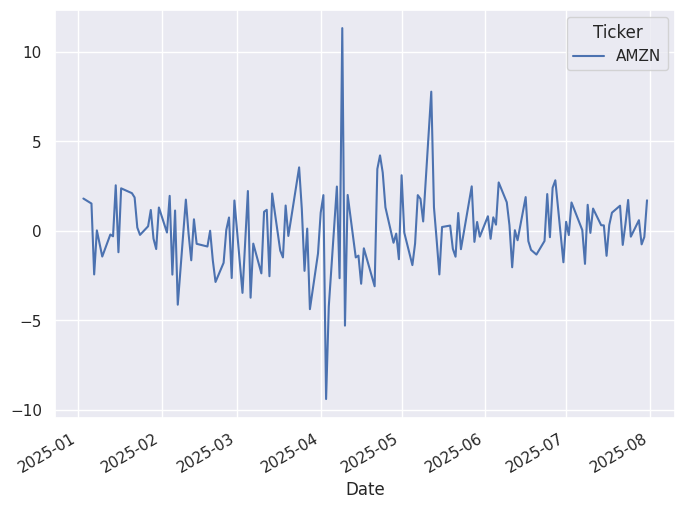

In [ ]:
amznReturn.plot()

In [ ]:
amznReturn.dropna(inplace=True)
amznReturn.describe()

Ticker,AMZN
count,143.000000
mean,0.042448
std,2.247851
min,-9.410000
25%,-1.100000
50%,0.010000
75%,1.345000
max,11.310000


In [ ]:
from scipy import stats

In [ ]:
n, minmax, mean, var, skew, kurt = stats.describe(amznReturn)
mini, max = minmax
std = var ** .5

In [ ]:
from scipy.stats import norm
x = norm.rvs(mean, std, n)

(array([ 2.,  2.,  9.,  6.,  9., 25., 18., 22., 17., 13., 12.,  2.,  1.,
         1.,  4.]),
 array([-5.65180411, -4.83999518, -4.02818624, -3.21637731, -2.40456837,
        -1.59275944, -0.7809505 ,  0.03085843,  0.84266737,  1.6544763 ,
         2.46628523,  3.27809417,  4.0899031 ,  4.90171204,  5.71352097,
         6.52532991]),
 <BarContainer object of 15 artists>)

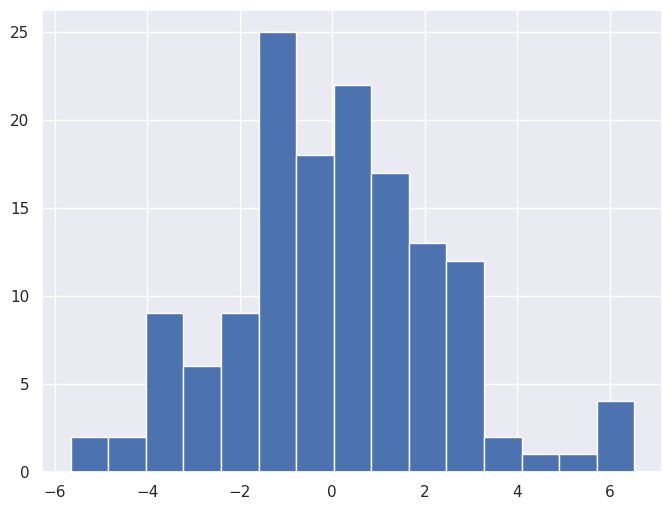

In [ ]:
plt.hist(x, bins = 15)

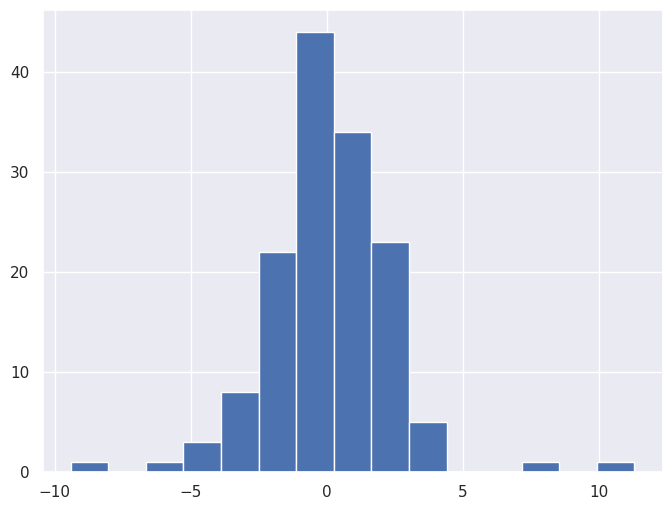

In [ ]:
plt.hist(amznReturn, bins = 15);

In [ ]:
x_test = stats.kurtosistest(x)
amznTest=  stats.kurtosistest(amznReturn.values)
print(f'{"    Teste statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"AMZN: {amznTest[0][0]:13.2f}{amznTest[1][0]:16.2f}")

    Teste statistic         p-value
     ------------------------------
x:             0.92          0.3593
AMZN:          5.15            0.00


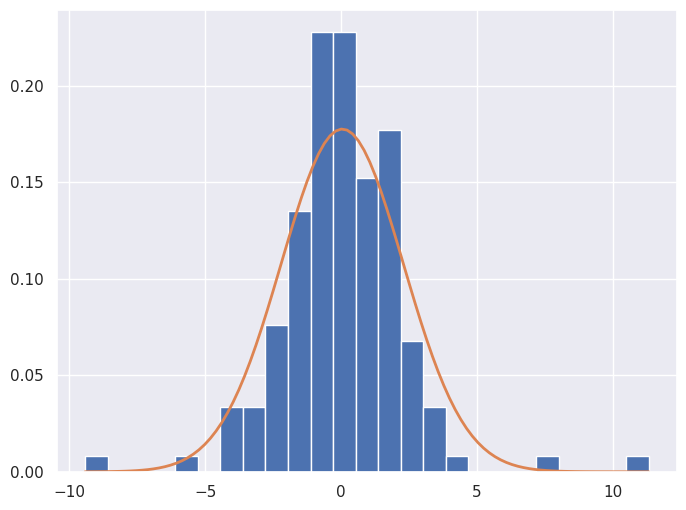

In [ ]:
plt.hist(amznReturn, bins = 25,
         edgecolor= 'w', density=True)
overlay = np.linspace(mini, max, 100)
plt.plot(overlay, norm.pdf(overlay, mean, std),
         lw=2)



In [ ]:
stats.ttest_1samp(amznReturn.sample(100), 0, alternative = 'two-sided')


TtestResult(statistic=array([0.37580239]), pvalue=array([0.70786787]), df=array([99]))

In [ ]:
amznClose = pd.DataFrame(amznClose)
amznClose['lag_1'] = amznClose['AMZN'].shift(1)
amznClose['lag_2'] = amznClose['AMZN'].shift(2)
amznClose.dropna(inplace=True)
amznClose.head()


Ticker,AMZN,lag_1,lag_2
Date,,,
2025-01-06,227.610001,224.190002,220.220001
2025-01-07,222.110001,227.610001,224.190002
2025-01-08,222.130005,222.110001,227.610001
2025-01-10,218.940002,222.130005,222.110001
2025-01-13,218.460007,218.940002,222.130005


In [ ]:
np.linalg.lstsq(amznClose[['lag_1', 'lag_2']], amznClose['AMZN'], rcond=None)[0]

array([0.87593981, 0.1242725 ])

In [ ]:
amznClose['predict'] = np.dot(amznClose[['lag_1', 'lag_2']], np.linalg.lstsq(amznClose[['lag_1', 'lag_2']], amznClose['AMZN'], rcond=None)[0])
amznClose.drop(columns= ['perdict'], inplace = True)
amznClose.head()

Ticker,AMZN,lag_1,lag_2,predict
Date,,,,
2025-01-06,227.610001,224.190002,220.220001,223.744238
2025-01-07,222.110001,227.610001,224.190002,227.233313
2025-01-08,222.130005,222.110001,227.610001,222.840656
2025-01-10,218.940002,222.130005,222.110001,222.174679
2025-01-13,218.460007,218.940002,222.130005,219.382915


<Axes: xlabel='Date'>

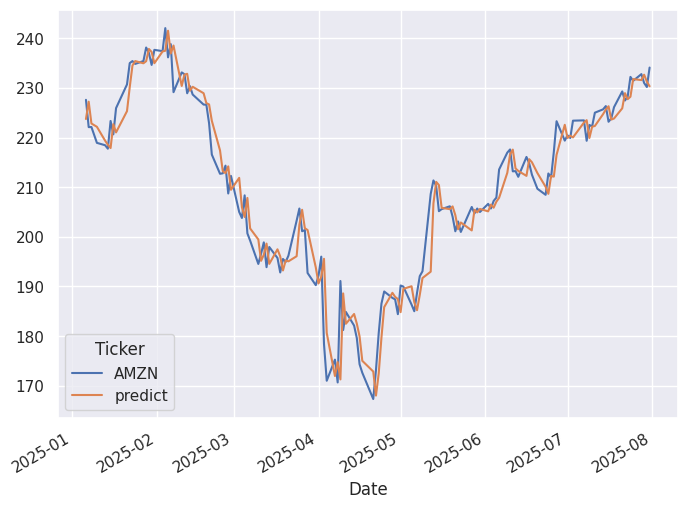

In [ ]:
amznClose[['AMZN', 'predict']].plot()